# File and libraries

In [1]:
import pandas as pd


filepath=r'google_merch_store_raw_merge.csv'

sample_filepath=r'google_merch_store_ga4_merch_flattened_raw_000000000000.csv'



file_tag = "ga4_merch_store"


## DSLabs

In [2]:
%run "dslabs_functions.py"


# Load

In [3]:
data=pd.read_csv(filepath)

data.head()

,event_date,session_id,user_pseudo_id,event_name,event_timestamp,page_location,page_title,device_category,device_mobile_brand_name,device_mobile_model_name,...,item_id,item_name,item_brand,item_variant,item_category,price,quantity,item_revenue,item_list_index,promotion_name
0,2020-12-24,4969127937,5.157889e+06,add_payment_info,1608829882058276,https://shop.googlemerchandisestore.com/paymen...,Payment Method,desktop,Google,ChromeBook,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-24,972367636,6.107506e+07,scroll,1608825189361207,https://shop.googlemerchandisestore.com/asearc...,Store search results,desktop,Google,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-24,7663299872,3.087717e+06,session_start,1608785340382018,https://shop.googlemerchandisestore.com/store....,Home,mobile,Huawei,<Other>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-24,2522966091,6.271470e+06,first_visit,1608820634895030,http://shop.googlemerchandisestore.com/google,Page Unavailable,desktop,Google,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-24,8141613662,8.410505e+07,scroll,1608815456120537,https://shop.googlemerchandisestore.com/,Home,desktop,Google,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dimensionality

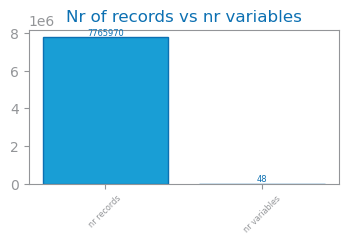

In [4]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

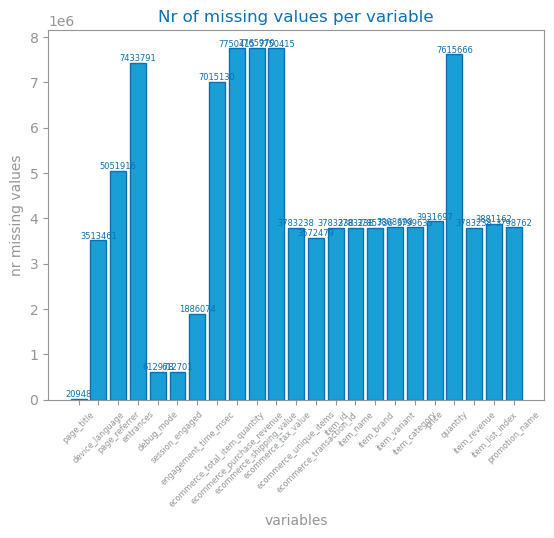

In [5]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
# savefig(f"{file_tag}_mv.png")
show()

## Variables Type

In [6]:
data.dtypes


event_date                          object
session_id                           int64
user_pseudo_id                     float64
event_name                          object
event_timestamp                      int64
page_location                       object
page_title                          object
device_category                     object
device_mobile_brand_name            object
device_mobile_model_name            object
device_mobile_marketing_name        object
device_operating_system             object
device_operating_system_version     object
device_language                     object
device_is_limited_ad_tracking       object
device_web_info_browser             object
device_web_info_browser_version     object
geo_continent                       object
geo_country                         object
geo_region                          object
geo_city                            object
geo_sub_continent                   object
geo_metro                           object
traffic_sou

In [7]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['session_id', 'user_pseudo_id', 'event_timestamp', 'entrances', 'debug_mode', 'ga_session_number', 'engagement_time_msec', 'ecommerce_total_item_quantity', 'ecommerce_purchase_revenue', 'ecommerce_shipping_value', 'ecommerce_tax_value', 'ecommerce_unique_items', 'price', 'quantity', 'item_revenue', 'item_list_index'], 'binary': ['session_engaged'], 'date': ['event_date'], 'symbolic': ['event_name', 'page_location', 'page_title', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_mobile_marketing_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_is_limited_ad_tracking', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_continent', 'geo_country', 'geo_region', 'geo_city', 'geo_sub_continent', 'geo_metro', 'traffic_source_name', 'traffic_source_medium', 'traffic_source_source', 'page_referrer', 'ecommerce_transaction_id', 'item_id', 'item_name', 'item_brand', 'item_variant', 'item_c

## box plot variables

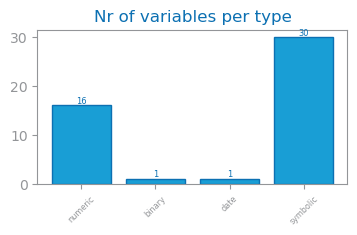

In [8]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [9]:
summary5: DataFrame = data.describe(include="all")
summary5

,event_date,session_id,user_pseudo_id,event_name,event_timestamp,page_location,page_title,device_category,device_mobile_brand_name,device_mobile_model_name,...,item_id,item_name,item_brand,item_variant,item_category,price,quantity,item_revenue,item_list_index,promotion_name
count,7765970,7.765970e+06,7.765970e+06,7765970,7.765970e+06,7765970,7745022,7765970,7765970,7765970,...,3982732,3982732,3980234,3957272,3966335,3.834273e+06,1.503040e+05,3.982732e+06,3.884808e+06,3967208
unique,NaN,NaN,NaN,17,NaN,2517,500,3,8,10,...,1394,431,6,66,81,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,view_item,NaN,https://shop.googlemerchandisestore.com/Google...,Home,desktop,Apple,Chrome,...,(not set),(not set),(not set),(not set),Home/Apparel/Men's / Unisex/,NaN,NaN,NaN,NaN,(not set)
freq,NaN,NaN,NaN,2892438,NaN,726468,1250797,4520864,3302019,2156212,...,130641,148458,3690460,3841196,666832,NaN,NaN,NaN,NaN,3771791
mean,2020-12-14 06:05:33.880659968,4.988363e+09,2.607759e+08,NaN,1.607969e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.655126e+01,1.679356e+04,9.092000e-02,7.024386e+00,NaN
min,2020-11-01 00:00:00,1.205000e+03,1.000300e+06,NaN,1.604189e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,NaN
25%,2020-11-26 00:00:00,2.506731e+09,5.809643e+06,NaN,1.606370e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.300000e+01,1.000000e+00,0.000000e+00,4.000000e+00,NaN
50%,2020-12-11 00:00:00,4.989826e+09,2.295893e+07,NaN,1.607687e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.200000e+01,1.000000e+00,0.000000e+00,7.000000e+00,NaN
75%,2021-01-04 00:00:00,7.486367e+09,6.172982e+07,NaN,1.609795e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,NaN
max,2021-01-31 00:00:00,9.999997e+09,9.994023e+09,NaN,1.612138e+15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.130000e+02,2.343435e+09,7.040000e+02,1.500000e+02,NaN


## numeric Variables

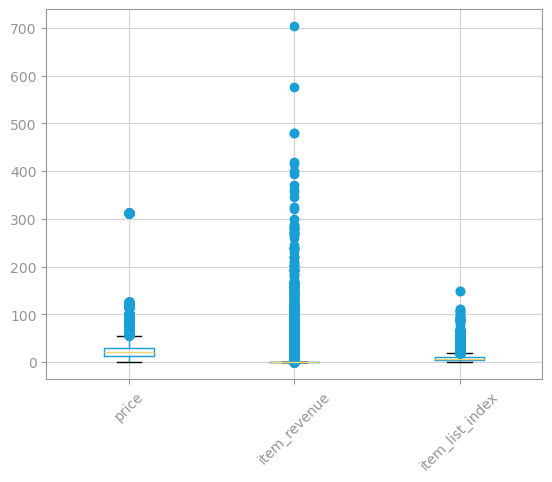

In [12]:
from matplotlib.pyplot import savefig, show


# variables_types: dict[str, list] = get_variable_types(data)
# numeric: list[str] = variables_types["numeric"]

# price is the only actual numeric variable as others are identifiers so might as well and filter for it
numeric: list[str] = ["price","item_revenue","item_list_index"]

if [] != numeric:
    data[numeric].boxplot(rot=45)
   # savefig(f"{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

In [ ]:
# from numpy import ndarray
# from matplotlib.figure import Figure
# from matplotlib.pyplot import savefig, show, subplots
# from dslabs_functions import define_grid, HEIGHT

# if [] != numeric:
#     rows: int
#     cols: int
#     rows, cols = define_grid(len(numeric))
#     fig: Figure
#     axs: ndarray
#     fig, axs = subplots(
#         rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
#     )
#     i, j = 0, 0
#     for n in range(len(numeric)):
#         axs[i, j].set_title("Boxplot for %s" % numeric[n])
#         axs[i, j].boxplot(data[numeric[n]].dropna().values)
#         i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
#     savefig(f"images/{file_tag}_single_boxplots.png")
#     show()
# else:
#     print("There are no numeric variables.")

# Balancing and class distribution

## first evaluation

ga_session_number
1      4828472
2      1010866
3       601986
4       385940
5       243580
        ...   
95           2
85           2
122          2
77           2
119          1
Name: count, Length: 100, dtype: int64


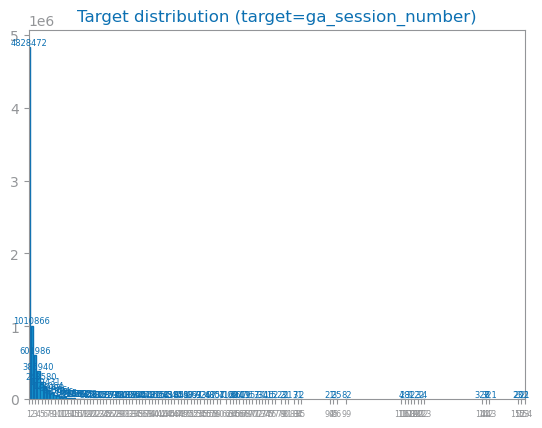

In [13]:
import matplotlib.pyplot as plt
    
from matplotlib.collections import PathCollection
from matplotlib.colorbar import Colorbar
from matplotlib.container import BarContainer
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
from matplotlib.axes import Axes
from matplotlib.pyplot import gca, gcf, savefig, subplots, text
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

target = "ga_session_number"

values: Series = data[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

## target column creation and distribution

we want to classify if that hit is from a returning or new user so we need to group the ga_session_number by 1 or more than 1 session. in this case, new user (ga_session_number = 1) will be 0 and returning user will be more than 1 (ga_session_number > 1)

In [14]:
data['returning_user'] = data['ga_session_number'].apply(lambda x: 0 if x == 1 else 1)


returning_user
0    4828472
1    2937498
Name: count, dtype: int64


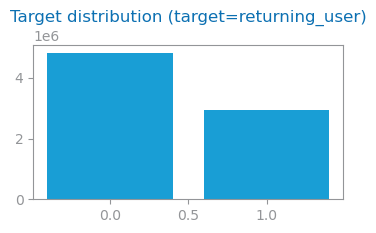

In [15]:
import matplotlib.pyplot as plt

target = "returning_user"

values = data[target].value_counts()
print(values)

# Criar a figura com o tamanho definido
plt.figure(figsize=(4, 2))

# Criar gráfico de barras
plt.bar(values.index.to_list(), values.to_list())

# Título
plt.title(f"Target distribution (target={target})")

# Guardar a figura
# plt.savefig(f"images/{file_tag}_class_distribution.png")

# Mostrar a figura
plt.show()

# Symbolic Variables

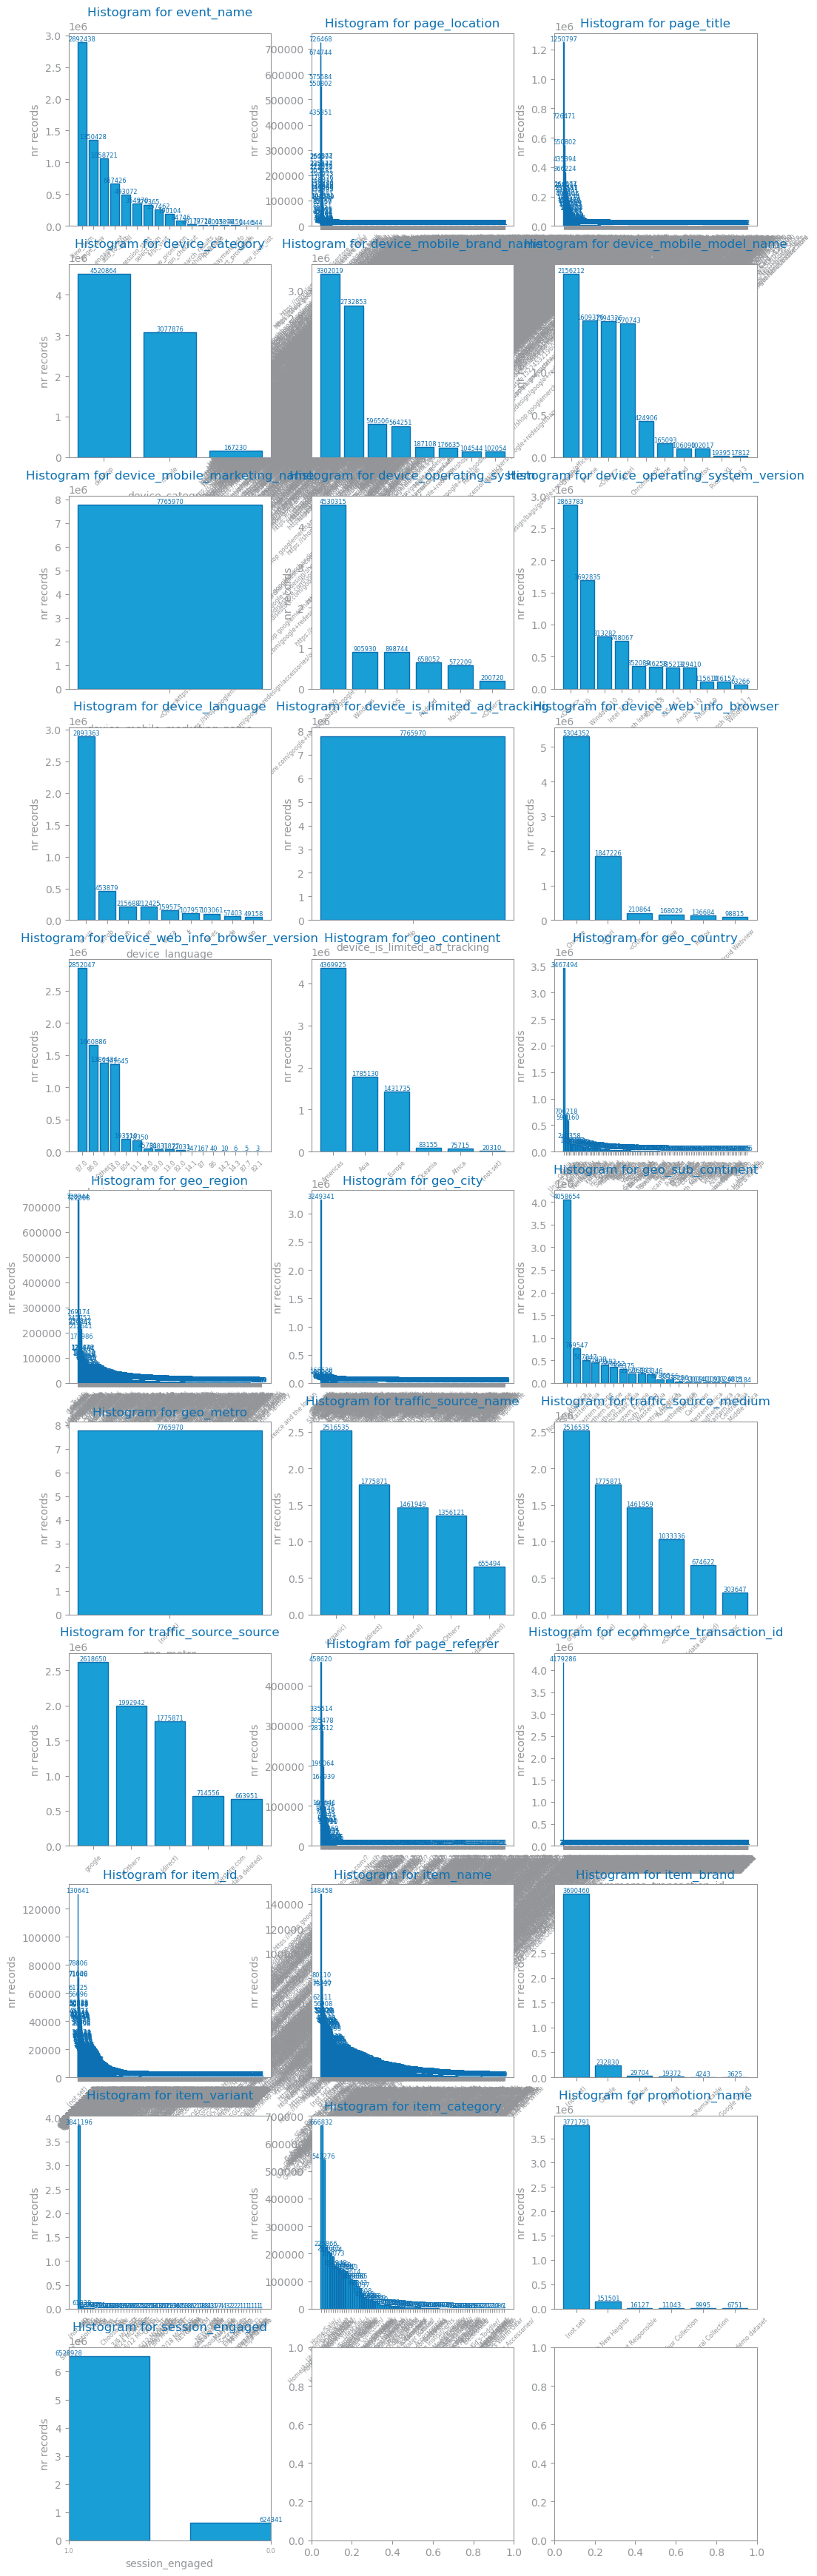

In [16]:
from dslabs_functions import plot_bar_chart

symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    # savefig(f"{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

# Symbolic distribution per target variable counts

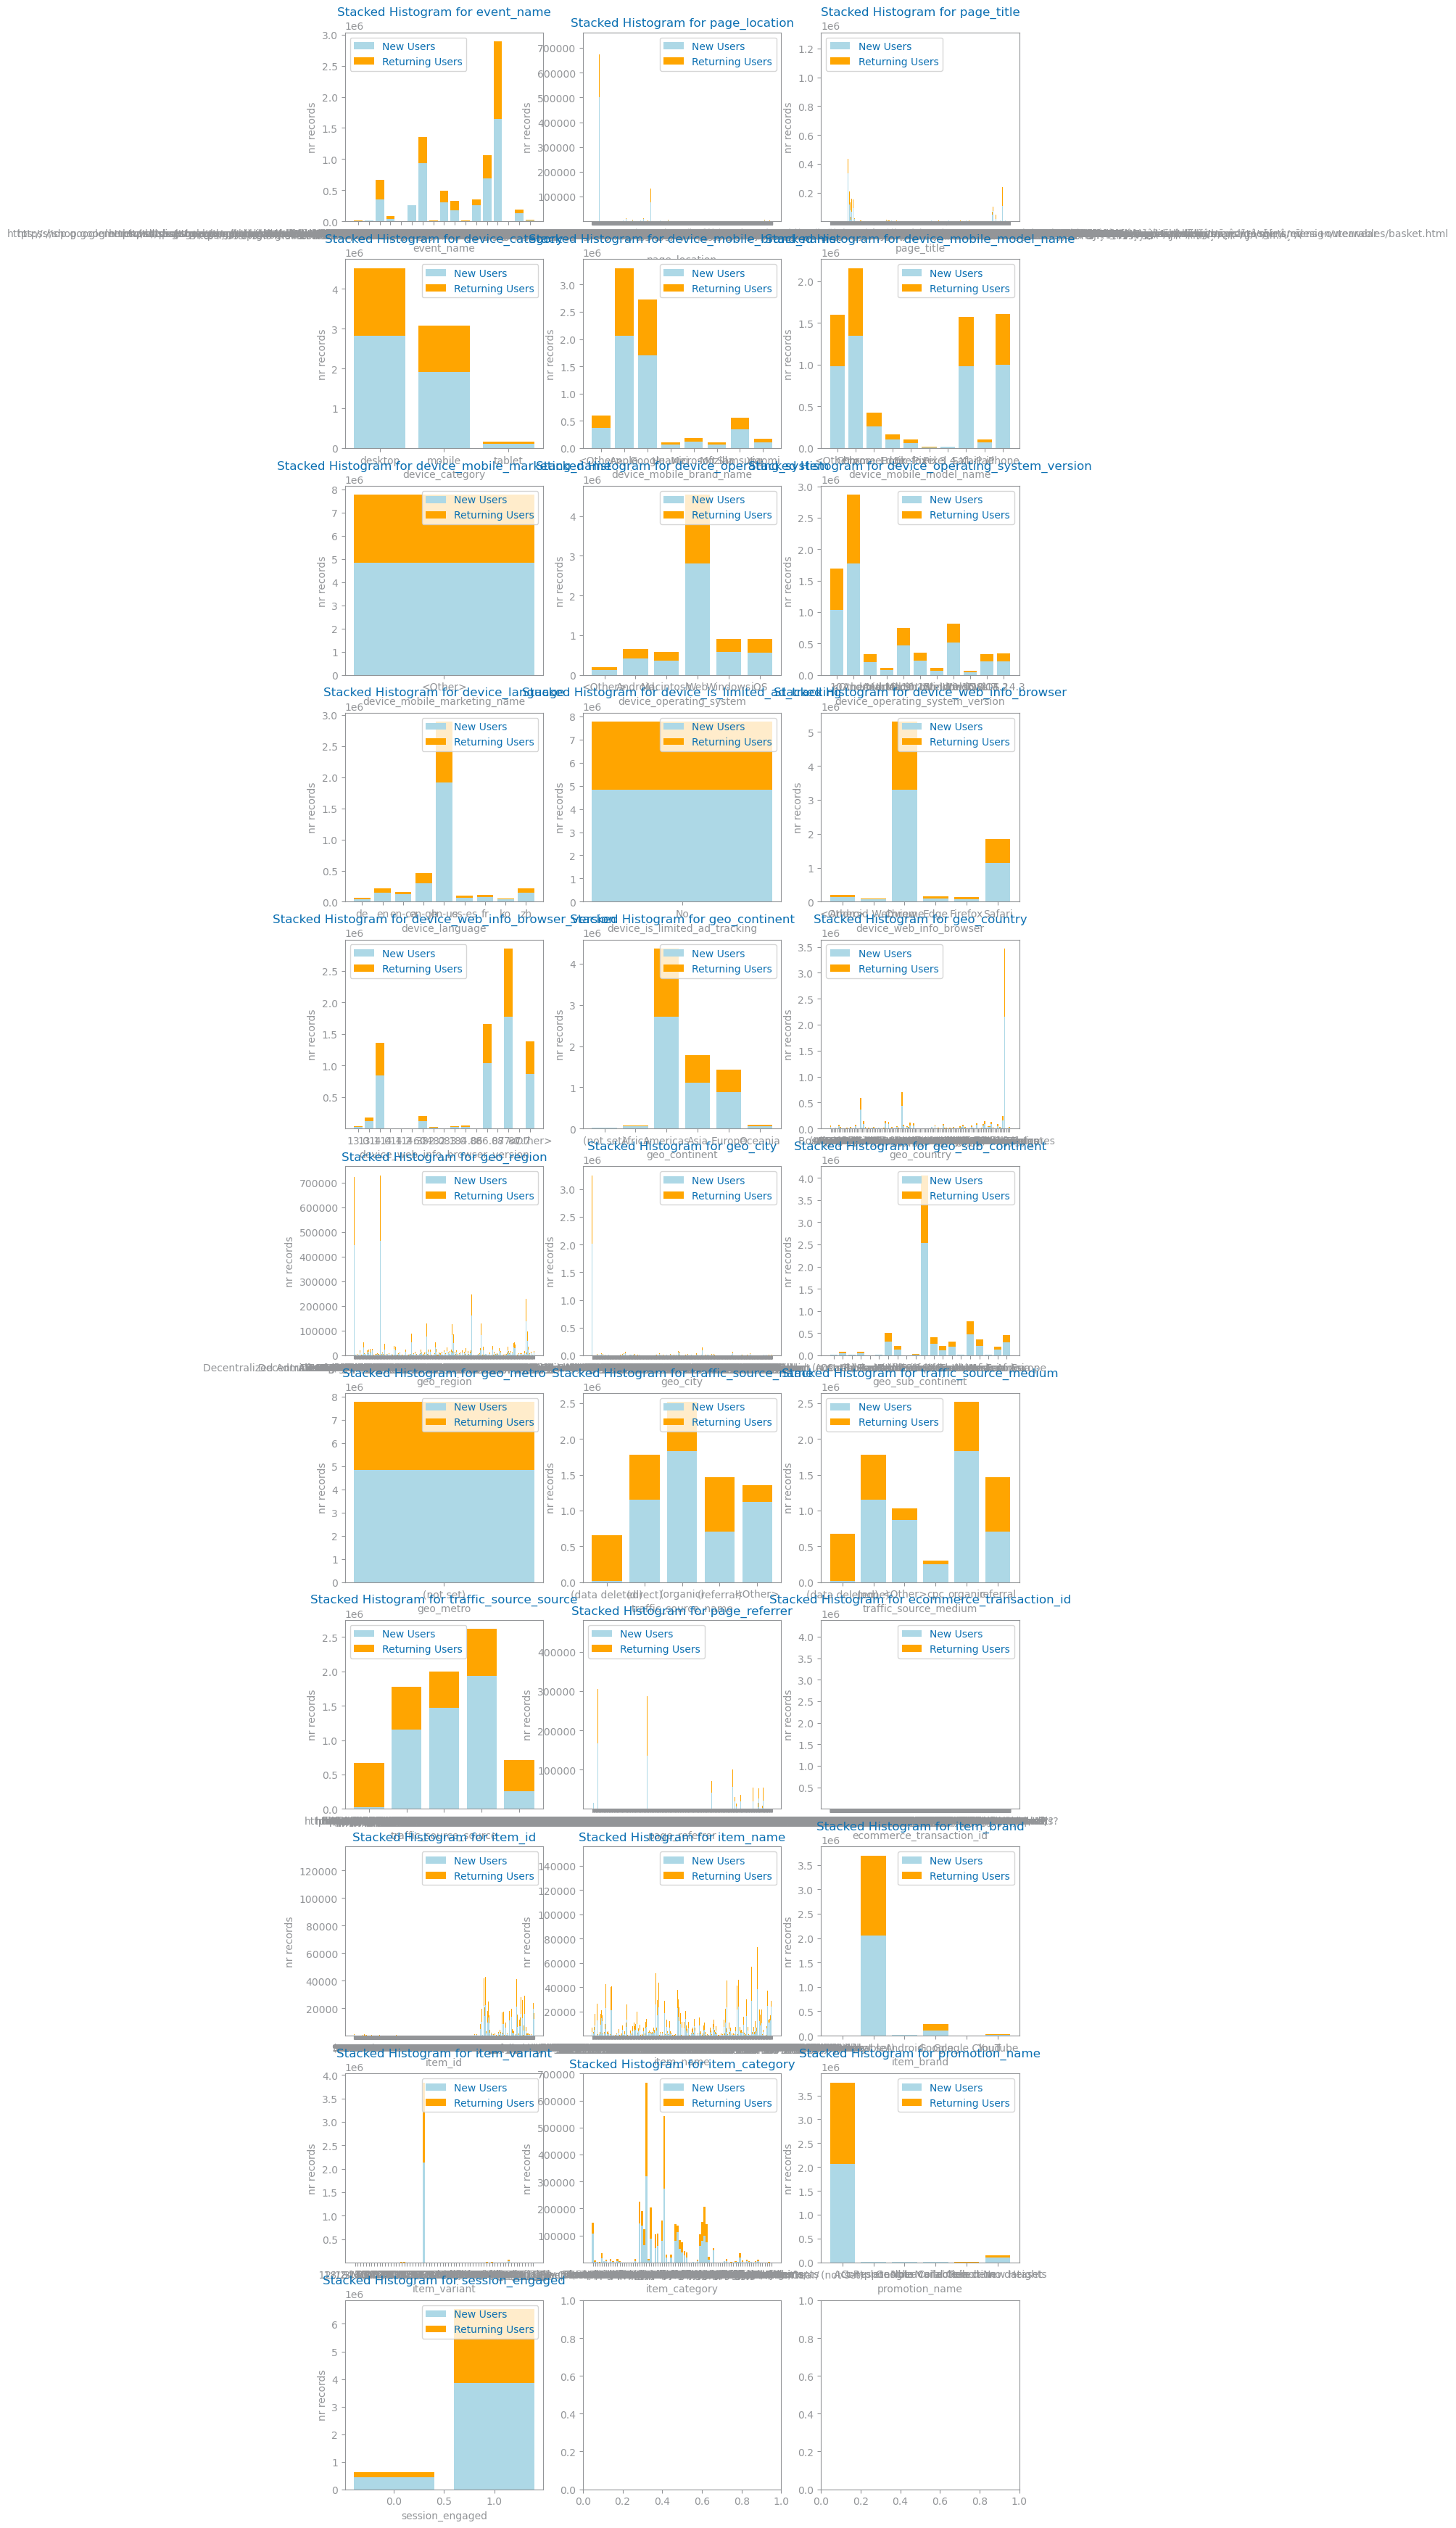

In [17]:
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        # Group by the symbolic variable and 'returning_user', and get counts
        grouped_counts: pd.DataFrame = data.groupby([symbolic[n], 'returning_user']).size().unstack(fill_value=0)
        
        # Get the index (categories) and values (counts of new and returning users)
        categories = grouped_counts.index.to_list()
        new_users = grouped_counts[0].to_list()  # New users (ga_session_number = 1)
        returning_users = grouped_counts[1].to_list()  # Returning users (ga_session_number > 1)

        # Plot stacked bar chart
        axs[i, j].bar(categories, new_users, label="New Users", color="lightblue")
        axs[i, j].bar(categories, returning_users, bottom=new_users, label="Returning Users", color="orange")

        # Add chart details
        axs[i, j].set_title(f"Stacked Histogram for {symbolic[n]}")
        axs[i, j].set_xlabel(symbolic[n])
        axs[i, j].set_ylabel("nr records")
        
        # Add legend
        axs[i, j].legend()

        # Move to the next subplot
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # Adjust layout
    fig.tight_layout()

### Filtered to top 10 value counts dimensions' per variable

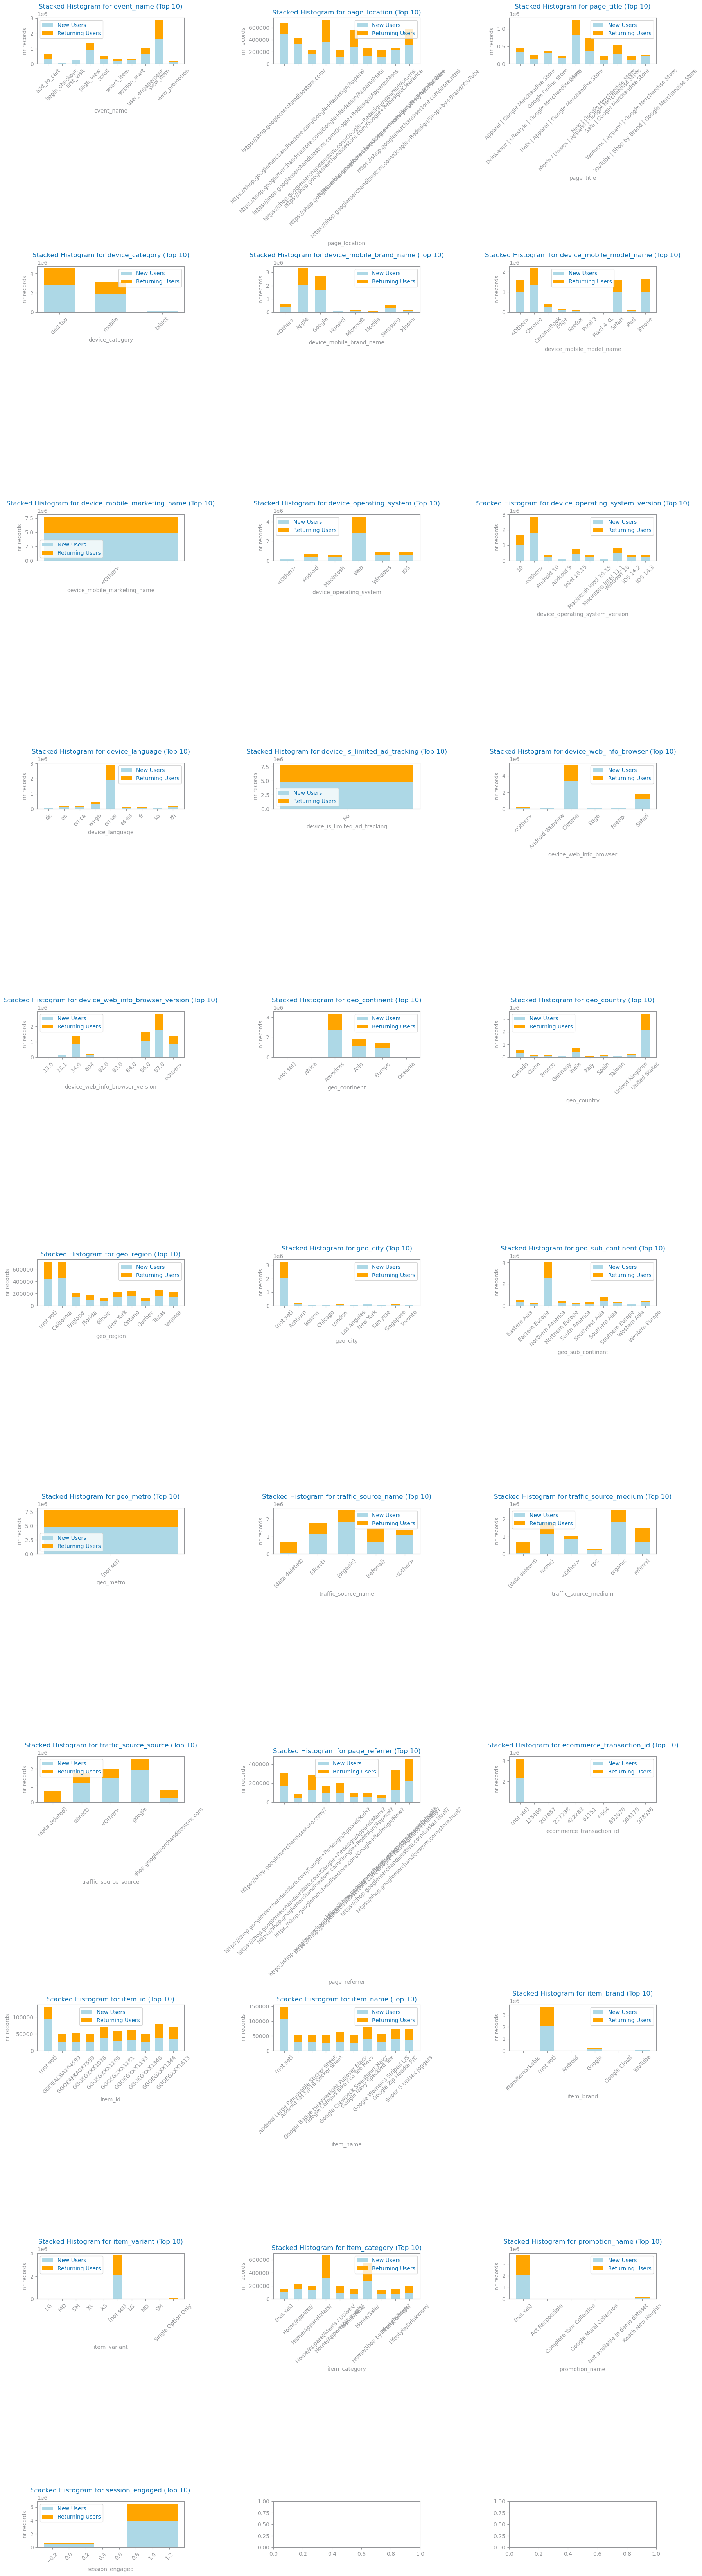

In [19]:

# Assuming you have already created a 'returning_user' column in your data

symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]

# Check if there are symbolic variables
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    
    # Increase the figure size to improve spacing (adjust the scale as needed)
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT * 1.5, rows * HEIGHT * 1.5), squeeze=False
    )
    
    i, j = 0, 0
    for n in range(len(symbolic)):
        # Get value counts for the symbolic variable and limit to top 10 categories
        top_10_categories = data[symbolic[n]].value_counts().nlargest(10).index

        # Filter the data to include only the top 10 categories for the symbolic variable
        filtered_data = data[data[symbolic[n]].isin(top_10_categories)]

        # Group by the symbolic variable and 'returning_user', and get counts
        grouped_counts: pd.DataFrame = filtered_data.groupby([symbolic[n], 'returning_user']).size().unstack(fill_value=0)

        # Get the index (top 10 categories) and values (counts of new and returning users)
        categories = grouped_counts.index.to_list()
        new_users = grouped_counts[0].to_list()  # New users (ga_session_number = 1)
        returning_users = grouped_counts[1].to_list()  # Returning users (ga_session_number > 1)

        # Plot stacked bar chart with adjusted bar width
        bar_width = 0.6  # Adjust bar width
        axs[i, j].bar(categories, new_users, width=bar_width, label="New Users", color="lightblue")
        axs[i, j].bar(categories, returning_users, bottom=new_users, width=bar_width, label="Returning Users", color="orange")

        # Add chart details
        axs[i, j].set_title(f"Stacked Histogram for {symbolic[n]} (Top 10)")
        axs[i, j].set_xlabel(symbolic[n])
        axs[i, j].set_ylabel("nr records")
        
        # Rotate x-axis labels for better readability
        axs[i, j].tick_params(axis='x', rotation=45)

        # Add legend
        axs[i, j].legend()

        # Move to the next subplot
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # Adjust layout for better fitting
    fig.tight_layout()

    # Show the plot
    show()

else:
    print("There are no symbolic variables.")



# Insights

1. Drop Columns
- geo metro - all "not set"
- geo city - very high share of null values
- id ad limited - all "No"
- device monile marketing name - all "not set"
- Does it make sense to keep "promotion name" since it has a high share of null values and its only related to a specific event? maybe persist the last value for the session

2. Device encoding
- Browser version -> Find what is the release date to understand if its a recent or old version compared to session date
- try to make hierarchy between android/ios on mobile and mac/windows as well as browsers per OS

3. region encoding
- try to relate continent and region on hierarchy of values

4. ecommerce events
- remove string values from item_ids
- make hierarchy between clothing, categories and brands

5. other event names
- make hierarchy between ecommerce, non ecommerce/journey events